# Individual Project
I am using the NYC Property Sales File for this project

In [2]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt 
import seaborn as sns

%matplotlib inline

In [4]:
df = pd.read_csv("nyc-rolling-sales.csv")
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [6]:
df.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [7]:
df_corr = df.drop(columns=['Unnamed: 0', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'EASE-MENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE', 'SALE DATE'], axis=1)

In [9]:
df_corr.head()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
0,1,392,6,10009,5,0,5,1633,6440,1900,6625000
1,1,399,26,10009,28,3,31,4616,18690,1900,-
2,1,399,39,10009,16,1,17,2212,7803,1900,-
3,1,402,21,10009,10,0,10,2272,6794,1913,3936272
4,1,404,55,10009,6,0,6,2369,4615,1900,8000000


In [13]:
df_corr.columns

Index(['BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS',
       'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET',
       'GROSS SQUARE FEET', 'YEAR BUILT', 'SALE PRICE'],
      dtype='object')

In [16]:
df_corr.rename(columns={'BOROUGH':'borough', 'BLOCK':'block', 'LOT':'lot', 
                        'ZIP CODE':'zipcode', 'RESIDENTIAL UNITS':'res_units', 
                        'COMMERCIAL UNITS':'com_units', 'TOTAL UNITS':'tunits', 
                        'LAND SQUARE FEET':'lsqft', 'GROSS SQUARE FEET':'gsqft', 
                        'YEAR BUILT':'yearbuilt', 'SALE PRICE':'saleprice'}, inplace=True)

In [17]:
df_corr.columns

Index(['borough', 'block', 'lot', 'zipcode', 'res_units', 'com_units',
       'tunits', 'lsqft', 'gsqft', 'yearbuilt', 'saleprice'],
      dtype='object')

In [19]:
df_corr.borough.unique()

array([1, 2, 3, 4, 5])

In [20]:
df_corr.block.unique()

array([ 392,  399,  402, ..., 6918, 7074, 7092])

In [21]:
df_corr.lot.unique()


array([  6,  26,  39, ..., 655, 423, 679])

In [22]:
df_corr.zipcode.unique()


array([10009,     0, 10002, 10011, 10001, 10014, 10010, 10013, 10038,
       10007, 10036, 10019, 10018, 10003, 10005, 10004, 10006, 10016,
       10012, 10026, 10030, 10031, 10027, 10035, 10037, 10029, 10039,
       10032, 10128, 10463, 10034, 10025, 10022, 10017, 10167, 10023,
       10105, 10033, 10044, 10280, 10282, 10281, 10065, 10021, 10075,
       10028, 10024, 10069, 10040, 10457, 10458, 10451, 10456, 10469,
       10466, 10475, 10468, 10467, 10460, 10473, 10472, 10464, 10462,
       10803, 10465, 10459, 10471, 10453, 10452, 10454, 10474, 10455,
       10461, 10470, 11228, 11214, 11220, 11209, 11219, 11221, 11233,
       11213, 11206, 11216, 11205, 11238, 11226, 11204, 11234, 11217,
       11201, 11218, 11232, 11230, 11235, 11212, 11237, 11207, 11236,
       11239, 11231, 11249, 11224, 11225, 11208, 11210, 11203, 11229,
       11215, 11223, 11222, 11211, 11370, 11691, 11692, 11102, 11106,
       11103, 11377, 11105, 11101, 11361, 11360, 11357, 11358, 11364,
       11693, 11694,

In [23]:
df_corr.res_units.unique()


array([   5,   28,   16,   10,    6,   20,    8,   44,   15,   24,   30,
          0,   47,  132,    1,    3,    4,    2,   22,    9,  210,   35,
         17,   11,    7,   18,   27,   14,   12,   21,   40,   19,   48,
         79,   55,  529,  476,  317,   42,   23,   25,  107,  133,   31,
         36,   34,   33,   90,   74,   29,   13,  286,  256,  771,  257,
         38,  311,   41,   51,   76,   54,   45,   72,   56,   68,   37,
         50,   26,   61,   60,  894,   67,  550,  184,   78,  181,   86,
        259,  102,  233,  121,   52, 1641,   96,   87,  100,  113,   99,
         92,   70,  369,   77,  232,  315,   91,   32,   66,   64,  109,
        387,  153,   59,  193,   62,  103,  146,  287,   94,   46,   84,
         75,   65,   95,   49,   63,   43,  716,  680,  179,   71,   39,
         53,  283,  114,   89,   73,   83,  498,   81,  162,  127,  222,
        130,   58,  159,  462,  142,  948,  129,  889,  271,  150,  120,
         57,  117,  106,   85,  118,  164,  139,  1

In [24]:
df_corr.com_units.unique() 


array([   0,    3,    1,    2,    4,   13,    5,   24,    6,   19,   10,
         15,   14,    8,    7,   35,   42,   55,   17,   38,   12,   27,
        422,    9,   23,   52,  318,   20,   67,   11,  254,   26,   49,
         30,   91,   59,   62,   31,   73,   56,   34,   32,   18,   22,
         28,  147,  184,   25,  172,  436,   16, 2261,   51,   21,  126])

In [25]:
df_corr.tunits.unique()


array([   5,   31,   17,   10,    6,   20,    8,   46,   15,   24,   34,
          0,   47,  132,    1,    4,    2,    3,    7,    9,   16,  211,
         32,   13,   19,   35,   18,   14,   30,   12,   21,   23,   45,
         26,   11,   48,   82,   55,   42,   38,   27,  422,  538,  482,
        323,   52,  318,   67,   25,   22,   28,  107,  137,   36,   37,
         96,  138,   76,   33,  286,  256,  771,  257,   44,  315,   41,
         51,   40,   29,   81,   54,   72,   56,   68,   74,   39,   50,
         61,  902,   70,  551,  254,  185,   78,  181,   49,   91,   87,
        269,  102,  234,  235,  233,   59,   62,   73,   43,  121, 1653,
        192,  100,  113,   99,   92,   75,  374,   77,  238,  317,   93,
         69,   60,   64,  111,  395,  155,  193,  103,  146,  287,   94,
         84,   65,   95,   63,   71,   57,  736,  680,  179,   53,  291,
         66,  114,   79,   83,  520,  163,  127,  222,  130,   90,   58,
        159,  462,  142,  955,  129,  889,  109,  1

In [26]:
df_corr.lsqft.unique()


array(['1633', '4616', '2212', ..., '11088', '208033', '10796'],
      dtype=object)

In [27]:
df_corr.gsqft.unique()


array(['6440', '18690', '7803', ..., '977', '2683', '64117'], dtype=object)

In [28]:
df_corr.yearbuilt.unique()


array([1900, 1913, 1920, 1910, 2009, 1925, 1902, 1928, 1930, 1935, 1937,
       1915, 1950, 1929, 1901, 1940, 2005,    0, 1989, 2014, 2008, 1965,
       2013, 2003, 2006, 2007, 1951, 1899, 1850, 1905, 1864, 1917, 1911,
       1983, 1926, 1963, 1960, 1889, 1898, 1939, 1938, 1927, 1909, 1958,
       1904, 1907, 1987, 1931, 1984, 1948, 2004, 1918, 1875, 2012, 1973,
       2011, 1922, 2001, 1932, 1980, 1908, 1953, 1906, 2015, 1946, 1921,
       2010, 1954, 1111, 1924, 1990, 1890, 1991, 1988, 1895, 2016, 1957,
       1986, 1966, 1998, 1870, 1923, 1969, 2017, 1968, 1934, 1956, 1982,
       1914, 1903, 1967, 1840, 1912, 1964, 1955, 1961, 1851, 2000, 1959,
       1962, 1945, 1972, 1976, 1916, 1880, 1970, 1846, 1941, 1952, 1896,
       1985, 1981, 1888, 1947, 1975, 1974, 2002, 1994, 1892, 1894, 1891,
       1996, 1997, 1949, 1999, 1800, 1979, 1971, 1977, 1942, 1978, 1826,
       1881, 1919, 1883, 1936, 1993, 1995, 1933, 1992, 1943, 1944, 1847,
       1829, 1844, 1835, 1852, 1856, 1854, 1832, 18

In [36]:
df_corr.saleprice.unique()

array(['6625000', '3936272', '8000000', ..., '408092', '11693337',
       '69300'], dtype=object)

In [30]:
df_corr.drop(df_corr[df_corr['saleprice']==' -  '].index, inplace=True)

In [37]:
df_corr.dropna(inplace=True)

In [39]:
df_corr.head()

,borough,block,lot,zipcode,res_units,com_units,tunits,lsqft,gsqft,yearbuilt,saleprice
0,1,392,6,10009,5,0,5,1633,6440,1900,6625000
3,1,402,21,10009,10,0,10,2272,6794,1913,3936272
4,1,404,55,10009,6,0,6,2369,4615,1900,8000000
6,1,406,32,10009,8,0,8,1750,4226,1920,3192840
9,1,387,153,10009,24,0,24,4489,18523,1920,16232000


In [41]:
print(df_corr.dtypes)

borough       int64
block         int64
lot           int64
zipcode       int64
res_units     int64
com_units     int64
tunits        int64
lsqft        object
gsqft        object
yearbuilt     int64
saleprice    object
dtype: object


In [42]:
def value_to_numeric(x):
    try:
        retValue = int(x)
        return retValue
    except ValueError:
        return 0
    
df_corr['saleprice_val'] = df_corr['saleprice'].apply(value_to_numeric)

In [43]:
df_corr['lsqft_val'] =  df_corr['lsqft'].apply(value_to_numeric)
df_corr['gsqft_val'] =  df_corr['gsqft'].apply(value_to_numeric)


In [44]:
print(df_corr.dtypes)

borough           int64
block             int64
lot               int64
zipcode           int64
res_units         int64
com_units         int64
tunits            int64
lsqft            object
gsqft            object
yearbuilt         int64
saleprice        object
saleprice_val     int64
lsqft_val         int64
gsqft_val         int64
dtype: object


In [45]:
df_corr.drop(columns=['lsqft','gsqft','saleprice'])

,borough,block,lot,zipcode,res_units,com_units,tunits,yearbuilt,saleprice_val,lsqft_val,gsqft_val
0,1,392,6,10009,5,0,5,1900,6625000,1633,6440
3,1,402,21,10009,10,0,10,1913,3936272,2272,6794
4,1,404,55,10009,6,0,6,1900,8000000,2369,4615
6,1,406,32,10009,8,0,8,1920,3192840,1750,4226
9,1,387,153,10009,24,0,24,1920,16232000,4489,18523
11,1,400,21,10009,10,0,10,2009,10350000,3717,12350
12,1,373,40,10009,0,0,0,1920,1,0,0
13,1,373,40,10009,0,0,0,1920,499000,0,0
14,1,373,40,10009,0,0,0,1920,10,0,0
15,1,373,40,10009,0,0,0,1920,529500,0,0


In [46]:
df_corr.drop(df_corr[df_corr['lsqft_val']==0].index, inplace=True)

In [47]:
df_corr.drop(df_corr[df_corr['gsqft_val']==0].index, inplace=True)

In [48]:
df_corr

,borough,block,lot,zipcode,res_units,com_units,tunits,lsqft,gsqft,yearbuilt,saleprice,saleprice_val,lsqft_val,gsqft_val
0,1,392,6,10009,5,0,5,1633,6440,1900,6625000,6625000,1633,6440
3,1,402,21,10009,10,0,10,2272,6794,1913,3936272,3936272,2272,6794
4,1,404,55,10009,6,0,6,2369,4615,1900,8000000,8000000,2369,4615
6,1,406,32,10009,8,0,8,1750,4226,1920,3192840,3192840,1750,4226
9,1,387,153,10009,24,0,24,4489,18523,1920,16232000,16232000,4489,18523
11,1,400,21,10009,10,0,10,3717,12350,2009,10350000,10350000,3717,12350
22,1,376,14,10009,24,0,24,4131,16776,1928,11900000,11900000,4131,16776
172,1,391,19,10009,3,1,4,1520,3360,1910,3300000,3300000,1520,3360
173,1,393,4,10009,4,1,5,2201,5608,1900,7215000,7215000,2201,5608
174,1,394,5,10009,5,1,6,1779,3713,1910,4750000,4750000,1779,3713


In [49]:
df_corr.corr()

,borough,block,lot,zipcode,res_units,com_units,tunits,yearbuilt,saleprice_val,lsqft_val,gsqft_val
borough,1.000000,0.187343,0.013984,0.100366,-0.098045,-0.010393,-0.087852,0.178184,-0.081010,0.009329,-0.099789
block,0.187343,1.000000,0.038450,0.414597,-0.058018,-0.007398,-0.052659,0.063050,-0.055626,-0.006265,-0.066879
lot,0.013984,0.038450,1.000000,-0.075401,-0.004235,-0.004012,-0.005692,0.054320,-0.007212,0.005678,-0.006335
zipcode,0.100366,0.414597,-0.075401,1.000000,-0.054569,-0.003643,-0.047749,-0.138835,-0.058361,-0.034232,-0.069432
res_units,-0.098045,-0.058018,-0.004235,-0.054569,1.000000,0.012086,0.846189,-0.001929,0.123751,0.403266,0.618935
com_units,-0.010393,-0.007398,-0.004012,-0.003643,0.012086,1.000000,0.543065,0.001002,0.047458,0.052571,0.068883
tunits,-0.087852,-0.052659,-0.005692,-0.047749,0.846189,0.543065,1.000000,-0.001091,0.129207,0.366663,0.556465
yearbuilt,0.178184,0.063050,0.054320,-0.138835,-0.001929,0.001002,-0.001091,1.000000,0.003993,0.018454,0.018215
saleprice_val,-0.081010,-0.055626,-0.007212,-0.058361,0.123751,0.047458,0.129207,0.003993,1.000000,0.037746,0.460036
lsqft_val,0.009329,-0.006265,0.005678,-0.034232,0.403266,0.052571,0.366663,0.018454,0.037746,1.000000,0.593343


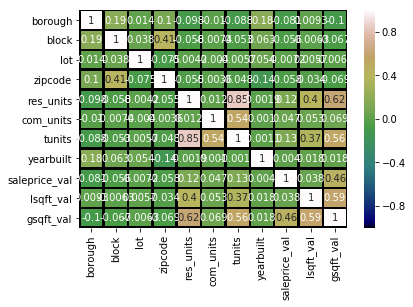

In [51]:
corr = df_corr.corr()

sns.heatmap(corr,cmap="gist_earth", vmin=-1, annot=True, linewidths=1.5, linecolor='black')

In [52]:
import statsmodels.formula.api as smf

In [54]:
result = smf.ols('saleprice_val ~ res_units + com_units + lsqft_val + gsqft_val', data=df_corr).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          saleprice_val   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     4590.
Date:                Tue, 05 Nov 2019   Prob (F-statistic):               0.00
Time:                        04:11:34   Log-Likelihood:            -6.5366e+05
No. Observations:               36821   AIC:                         1.307e+06
Df Residuals:                   36816   BIC:                         1.307e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.449e+05   6.56e+04     11.353      0.000    6.16e+05    8.73e+05
res_units  -1.838e+05   4162.566    -44.151      0.000   -1.92e+05   -1.76e+05
com_units   1.521e+04   5156.232      2.949      0.003    5099.180    2.53e+04
lsqft_val   -148.5123      2.249    -66.043      0.000    -152.920    -144.105
gsqft_val    367.9610      2.791    131.851      0.000     362.491     373.431
==============================================================================
Omnibus:                   125700.828   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     113581401293.209
Skew:                          62.535   Prob(JB):                         0.00
Kurtosis:                    8606.310   Cond. No.                     4.50e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""